<div style="background-color: #f7f7f7; padding: 20px; border-radius: 10px;">

<h1 style="color:#e5ff00;">Regression Model Performance Report</h1>

<p>In this report, an evaluation of different regression models is presented. The objective is to identify the best-performing model for predicting a target variable based on a set of features.</p>

<h2 style="color:#e5ff00;">Model Comparison</h2>

<h3 style="color:rgb(150, 67, 0);">Fixed Degree for Each Column (Polynomial Regression)</h3>
<ul>
    <li><b>Mean Squared Error (MSE):</b> 1.6892609852137395</li>
    <li><b>R-squared (Test):</b> 0.991725417775708</li>
    <li><b>R-squared (Train):</b> 0.9908949665411101</li>
</ul>

<h3 style="color: #009688;">Linear Regression (Fixed Degree for Each Column)</h3>
<ul>
    <li><b>Mean Squared Error (MSE):</b> 27.882923390742647</li>
    <li><b>R-squared (Test):</b> 0.8634198360881802</li>
    <li><b>R-squared (Train):</b> 0.8607186051220496</li>
</ul>

<h3 style="color: #009688;">Customized Degree for Each Column (Polynomial Regression)</h3>
<ul>
    <li><b>R-squared (Test):</b> -0.0016491787398942304</li>
    <li><b>R-squared (Train):</b> 0.0007980926119611764</li>
</ul>


<h2 style="color:rgb(255, 17, 0);">Analysis and Findings</h2>

<p>The "Fixed Degree for Each Column" Polynomial Regression model displayed superior performance when compared to other models. It achieved the lowest MSE and the highest R-squared values on both the test and training datasets, indicating the best fit to the data and the highest predictive accuracy.</p>

<p>In contrast, the "Linear Regression (Fixed Degree for Each Column)" model, while reasonable, exhibited higher MSE and slightly lower R-squared values compared to the Polynomial Regression with a fixed degree.</p>

<p>The "Customized Degree for Each Column" Polynomial Regression model performed poorly with a negative R-squared value on the test dataset, suggesting difficulties in capturing underlying data patterns.</p>

<h2 style="color:rgb(255, 0, 0);">Conclusion</h2>

<p>Based on the evaluation, the "Fixed Degree for Each Column" Polynomial Regression model is recommended as the preferred choice for predictive modeling on this dataset. Its combination of low MSE and high R-squared values on both test and training sets suggests it is the most effective model for making accurate predictions.</p>

<p>This report underscores the importance of model selection and customization to achieve optimal predictive performance. Further fine-tuning of hyperparameters and additional feature engineering could potentially improve model performance even further.</p>

</div>


<p style="font-size: 24px; font-weight: bold; color:rgb(255, 242, 0); margin-top: 10px;">IMPORT LIBRARIES</p>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
!pip install -q fasteda
from fasteda import fast_eda
import matplotlib.pyplot as plt
import seaborn as sns
!pip install -q adtk
from adtk.detector import InterQuartileRangeAD
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline

<p style="font-size: 24px; font-weight: bold; color:rgb(255, 196, 0); margin-top: 10px;">READ THE DATA</p>

In [2]:
df = pd.read_csv ("/kaggle/input/manufacturing-data-for-polynomial-regression/manufacturing.csv")

<p style="font-size: 24px; font-weight: bold; color:rgb(242, 255, 0); margin-top: 10px;">DATA OVERVIEW</p>

Dataset Info:
--------------------------------------------------
This section provides an overview of the dataset.
It shows the data types and non-null counts for each column.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3957 entries, 0 to 3956
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Temperature (°C)                3957 non-null   float64
 1   Pressure (kPa)                  3957 non-null   float64
 2   Temperature x Pressure          3957 non-null   float64
 3   Material Fusion Metric          3957 non-null   float64
 4   Material Transformation Metric  3957 non-null   float64
 5   Quality Rating                  3957 non-null   float64
dtypes: float64(6)
memory usage: 185.6 KB
None

Summary Statistics:
--------------------------------------------------
This section provides summary statistics for numerical columns.
It includes metrics like mean, standard deviati

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


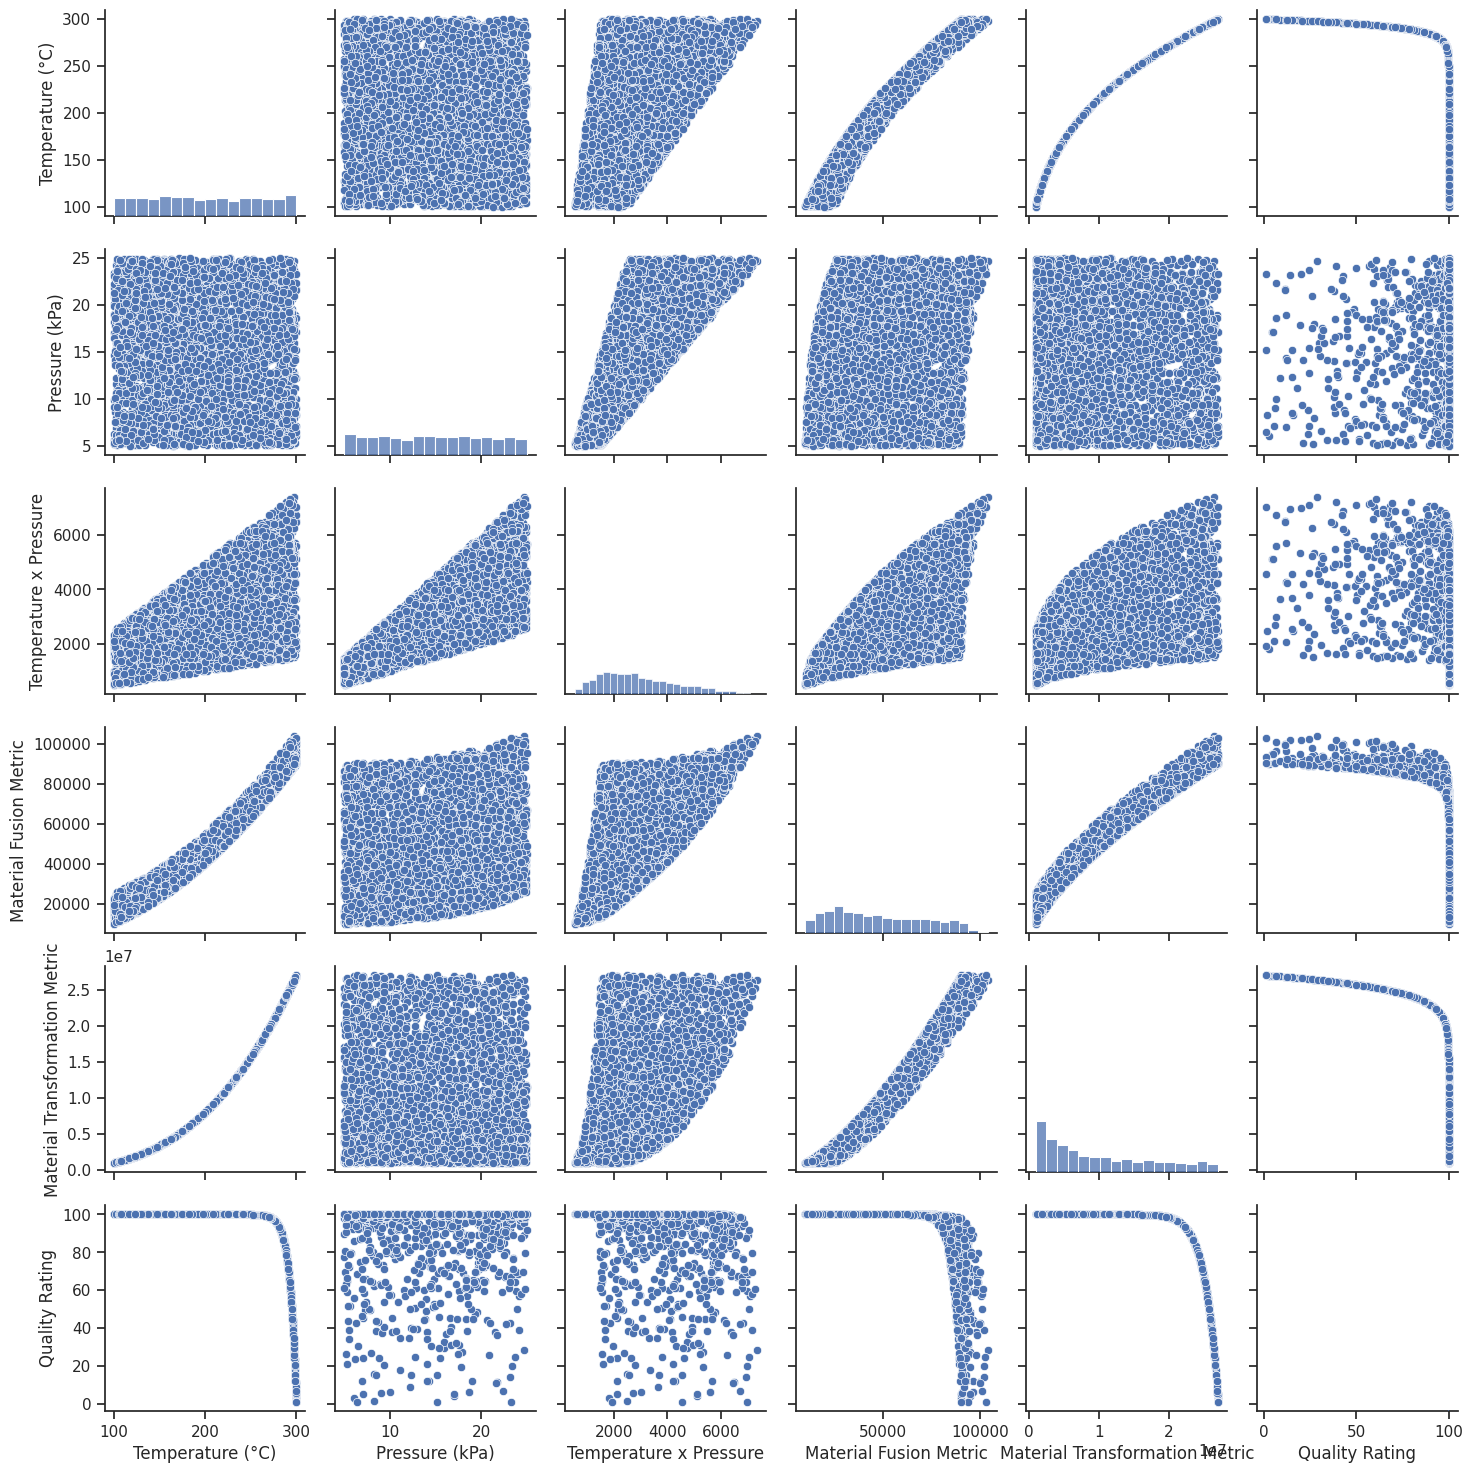


Correlation Heatmap:
--------------------------------------------------
A correlation heatmap displays the relationships (correlations) between variables.
Values close to 1 or -1 indicate strong correlations.
Values close to 0 indicate weak or no correlations.


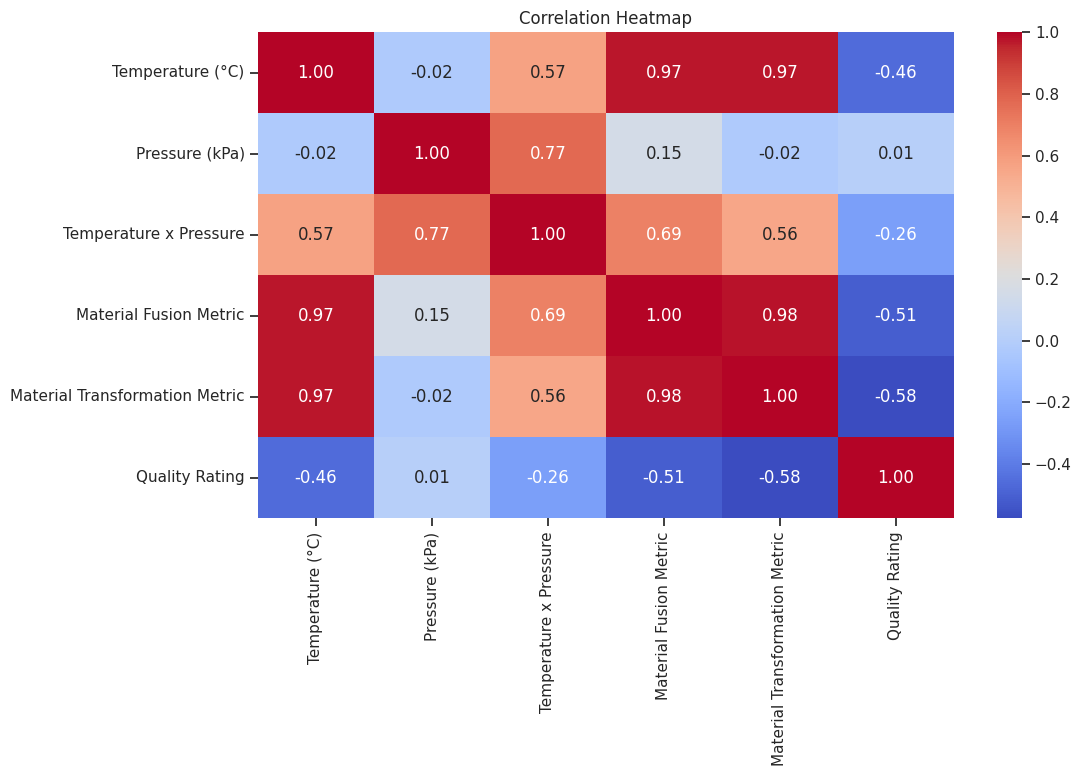

In [3]:
# ANSI escape code for bold text
bold = "\033[1m"
reset = "\033[0m"

# Display basic information about the dataset
print(f"{bold}Dataset Info:{reset}")
print("--------------------------------------------------")
print("This section provides an overview of the dataset.")
print("It shows the data types and non-null counts for each column.")
print(df.info())

# Display summary statistics of numerical columns
print(f"\n{bold}Summary Statistics:{reset}")
print("--------------------------------------------------")
print("This section provides summary statistics for numerical columns.")
print("It includes metrics like mean, standard deviation, minimum, and maximum values.")
print(df.describe())

# Check for missing values
print(f"\n{bold}Missing Values:{reset}")
print("--------------------------------------------------")
print("This section checks if there are any missing values in the dataset.")
print("It shows the count of missing values for each column.")
print(df.isnull().sum())

# Create pairplots to visualize relationships between numerical variables
sns.set(style="ticks")
print(f"\n{bold}Pairplots:{reset}")
print("--------------------------------------------------")
print("Pairplots are used to visualize relationships between numerical variables.")
print("Each plot compares two variables, and the diagonal displays histograms.")
sns.pairplot(df, vars=['Temperature (°C)', 'Pressure (kPa)', 'Temperature x Pressure',
                      'Material Fusion Metric', 'Material Transformation Metric', 'Quality Rating'])
plt.show()

# Create correlation matrix and heatmap to visualize correlations
correlation_matrix = df.corr()
print(f"\n{bold}Correlation Heatmap:{reset}")
print("--------------------------------------------------")
print("A correlation heatmap displays the relationships (correlations) between variables.")
print("Values close to 1 or -1 indicate strong correlations.")
print("Values close to 0 indicate weak or no correlations.")
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [4]:
df.head()

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
0,209.762701,8.050855,1688.769167,44522.217074,9.229576e+06,99.999971
1,243.037873,15.812068,3842.931469,63020.764997,1.435537e+07,99.985703
2,220.552675,7.843130,1729.823314,49125.950249,1.072839e+07,99.999758
3,208.976637,23.786089,4970.736918,57128.881547,9.125702e+06,99.999975
4,184.730960,15.797812,2918.345014,38068.201283,6.303792e+06,100.000000



Data Distribution Plots:
--------------------------------------------------
Data distribution plots, such as histograms, help visualize the distribution of individual numerical columns.
These plots can reveal the data's skewness and central tendencies.


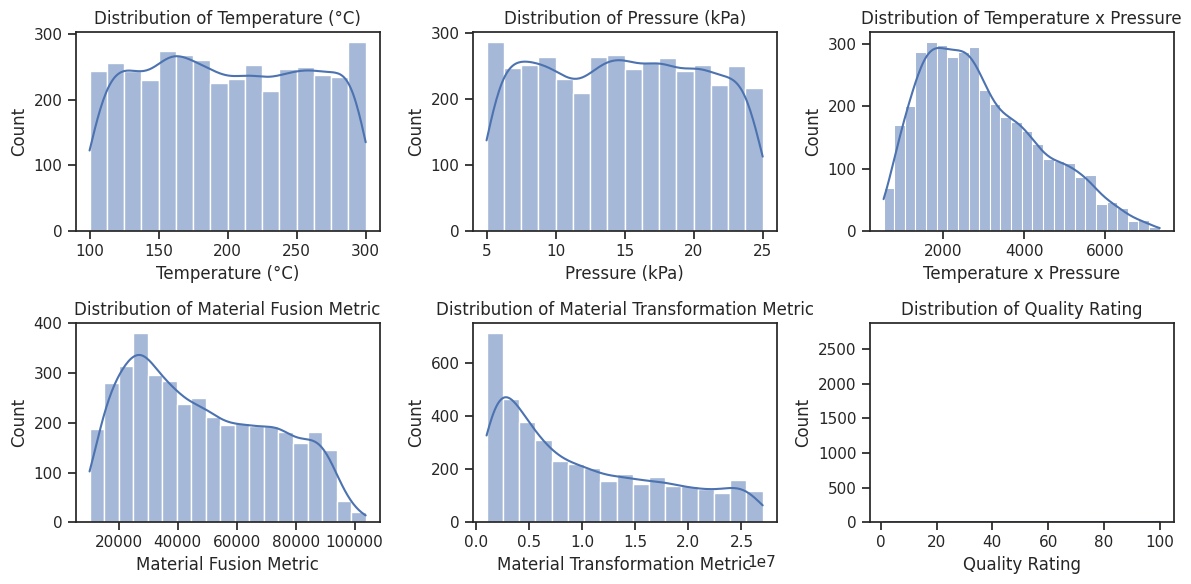


Box Plots:
--------------------------------------------------
Box plots provide a way to visualize the spread and presence of outliers in numerical columns.


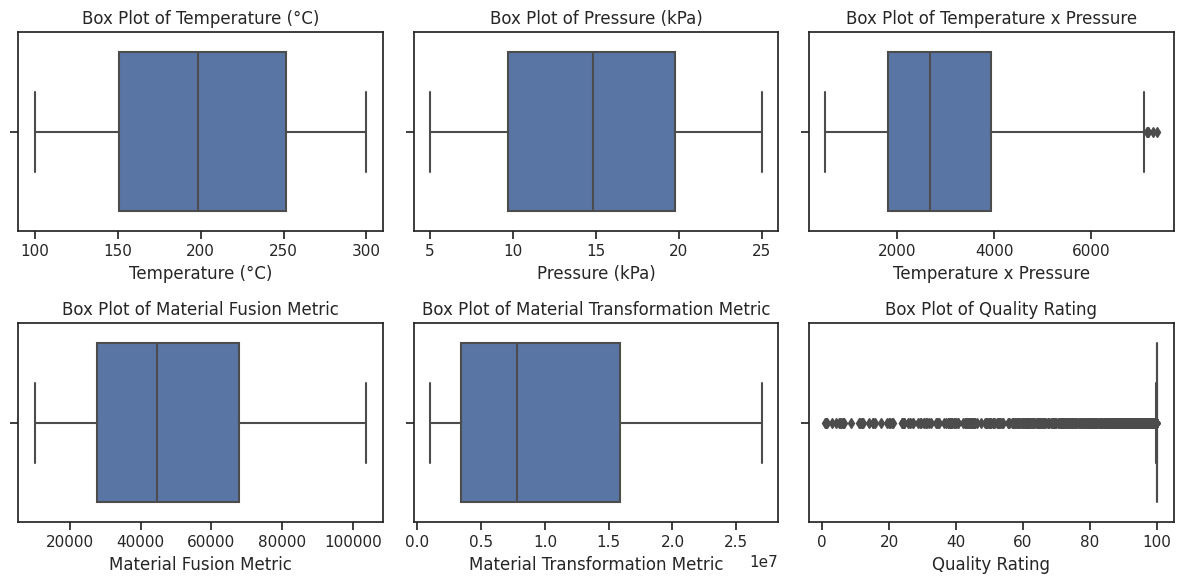

In [5]:
# Data Distribution Plots for numerical columns
print(f"\n{bold}Data Distribution Plots:{reset}")
print("--------------------------------------------------")
print("Data distribution plots, such as histograms, help visualize the distribution of individual numerical columns.")
print("These plots can reveal the data's skewness and central tendencies.")
plt.figure(figsize=(12, 6))
numerical_columns = df.columns
for i, col in enumerate(numerical_columns):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Box Plots for numerical columns
print(f"\n{bold}Box Plots:{reset}")
print("--------------------------------------------------")
print("Box plots provide a way to visualize the spread and presence of outliers in numerical columns.")
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_columns):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

## 

**Pairplot** is a data visualization technique provided by the Seaborn library in Python. It generates a grid of scatterplots for multiple numerical variables in a dataset, allowing you to quickly visualize the relationships and correlations between pairs of variables. This tool is especially useful for exploring the pairwise interactions within your data and identifying potential patterns and trends.

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


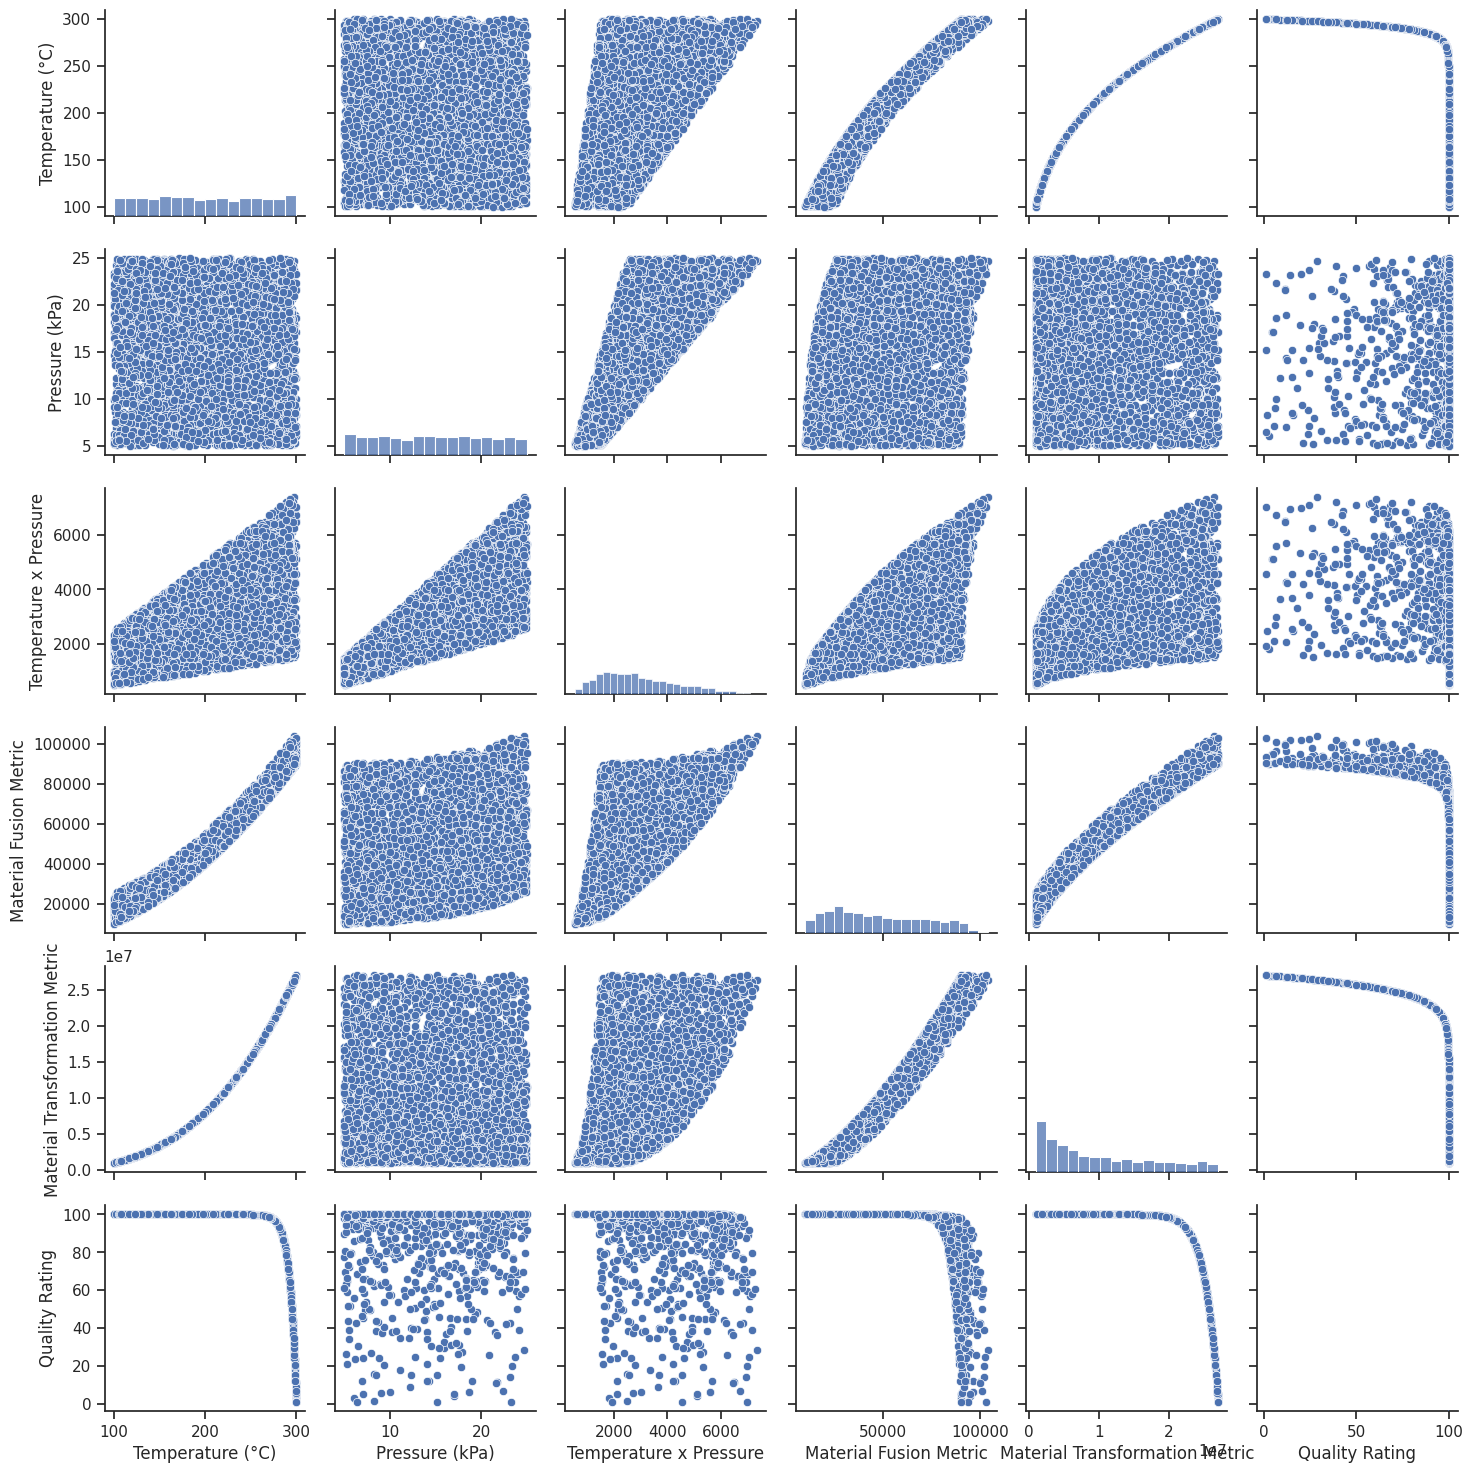

In [6]:
g = sns.pairplot(df)

<p style="font-size: 24px; font-weight: bold; color:rgb(255, 200, 0); margin-top: 10px;">FIND THE BEST POLYNOMAL DEGREE FOR EACH COLUMN</p>

## Polynomial Regression for Feature Analysis

### Code Overview

This code accomplishes the following tasks:

1. **Data Preparation**: It separates the dataset into two parts - the feature variables (X) and the target variable (y).

2. **Data Splitting**: The code further splits the data into training and testing sets to evaluate model performance.

3. **Polynomial Degree Selection**: For each feature column, the code iteratively performs the following steps:
   - It explores different polynomial degrees ranging from 1 to 29.
   - Builds polynomial regression models for each degree and assesses their performance using the Mean Squared Error (MSE).
   - Keeps track of the best degree, which corresponds to the lowest MSE.

4. **Results Storage**: The code maintains a record of the best polynomial degrees and their respective MSE values for each feature column.

5. **Printing Results**: Finally, the code prints the best polynomial degree for each feature column, providing an explanation of its suitability for modeling the relationship between that specific column and the 'Quality Rating'.

This comprehensive approach helps in determining the optimal polynomial degrees for feature columns, enhancing the understanding of their impact on the 'Quality Rating'.


In [7]:
X = df.drop('Quality Rating', axis=1)
y = df['Quality Rating']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize dictionaries to store the best polynomial degree for each column
best_degrees = {}

# Initialize dictionaries to store the MSE values for each degree
mse_values = {}

# Loop through each column and find the best polynomial degree
for column in X.columns:
    best_degree = 1  # Initialize the best degree to 1
    best_mse = float('inf')  # Initialize the best MSE to infinity
    degrees = list(range(1, 30))  # Degrees from 1 to 10
    mse_list = []  # List to store MSE values for each degree
    
    for degree in degrees:
        # Create polynomial features
        poly = PolynomialFeatures(degree=degree)
        X_train_poly = poly.fit_transform(X_train[[column]])
        X_test_poly = poly.transform(X_test[[column]])
        
        # Fit a linear regression model
        model = LinearRegression()
        model.fit(X_train_poly, y_train)
        
        # Make predictions on the test set
        y_pred = model.predict(X_test_poly)
        
        # Calculate mean squared error (MSE)
        mse = mean_squared_error(y_test, y_pred)
        
        # Append MSE to the list
        mse_list.append(mse)
        
        # Update best_degree if this degree has a lower MSE
        if mse < best_mse:
            best_mse = mse
            best_degree = degree
    
    # Store the best degree for this column in the dictionary
    best_degrees[column] = best_degree
    
    # Store the MSE values for this column in the dictionary
    mse_values[column] = mse_list

# Print explanations for the best degrees for each column
for column, degree in best_degrees.items():
    print(f"The best polynomial degree for {column} is \033[91m{degree}\033[0m. This degree provides the best trade-off between complexity and accuracy for modeling the relationship between the column and the quality rating.")
    print("\n")

The best polynomial degree for Temperature (°C) is 29. This degree provides the best trade-off between complexity and accuracy for modeling the relationship between the column and the quality rating.


The best polynomial degree for Pressure (kPa) is 3. This degree provides the best trade-off between complexity and accuracy for modeling the relationship between the column and the quality rating.


The best polynomial degree for Temperature x Pressure is 9. This degree provides the best trade-off between complexity and accuracy for modeling the relationship between the column and the quality rating.


The best polynomial degree for Material Fusion Metric is 5. This degree provides the best trade-off between complexity and accuracy for modeling the relationship between the column and the quality rating.


The best polynomial degree for Material Transformation Metric is 15. This degree provides the best trade-off between complexity and accuracy for modeling the relationship between the co

<p style="font-size: 24px; font-weight: bold; color:rgb(248, 255, 105); margin-top: 10px;">VISUALIZE DEGREE - MSE GRAPHS FOR EACH COLUMN</p>

## Polynomial Degree Selection Visualization

### Code Overview

This code performs the following tasks for each column in the dataset:

1. **Loop through Columns**: It iterates through the columns in the dataset.

2. **Create Figure**: The code creates a new plot with a specified size, providing a blank canvas for visualization.

3. **Plot MSE Values**: For each column, it plots Mean Squared Error (MSE) values against polynomial degrees. MSE values are represented as blue circles with a connecting line for clarity.

4. **Find Lowest MSE**: The code identifies and highlights the point with the lowest MSE in red, helping to pinpoint the optimal polynomial degree.

5. **Show the Graph**: Finally, the code displays the plot for each column, allowing users to visualize the relationship between polynomial degree and MSE, facilitating informed decision-making in model selection.

This visualization process aids in the analysis of optimal polynomial degrees for each column, facilitating effective modeling of the data.

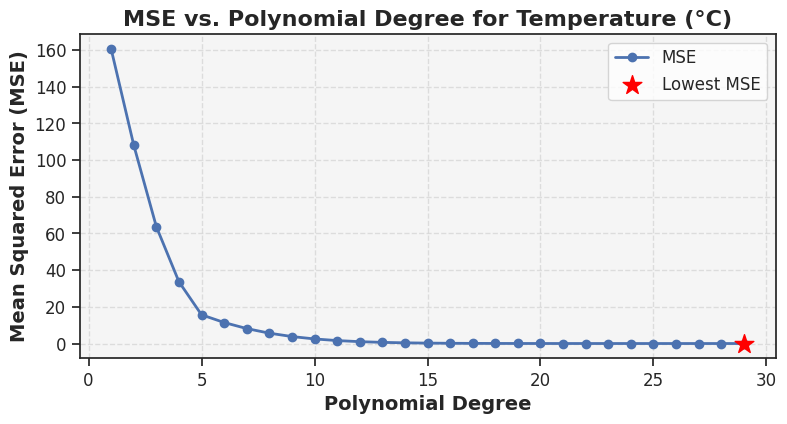

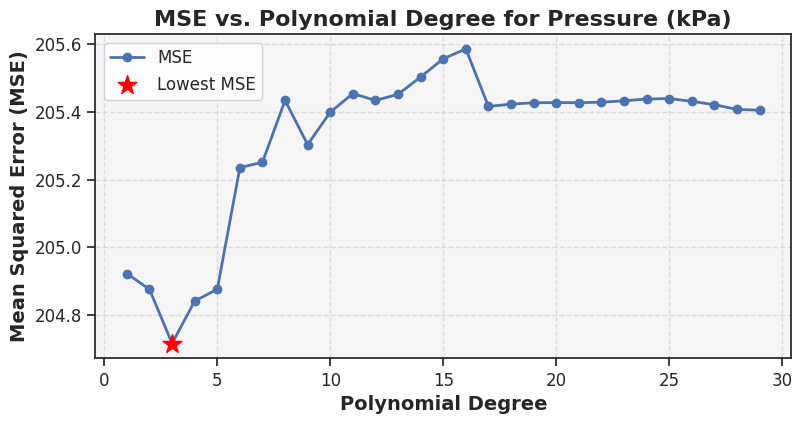

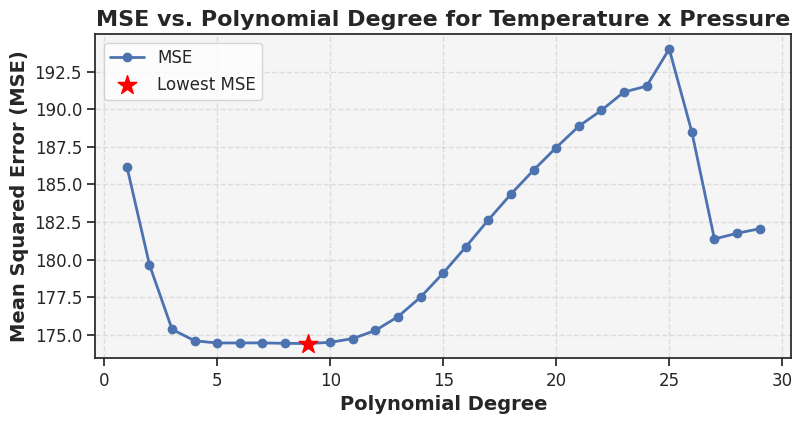

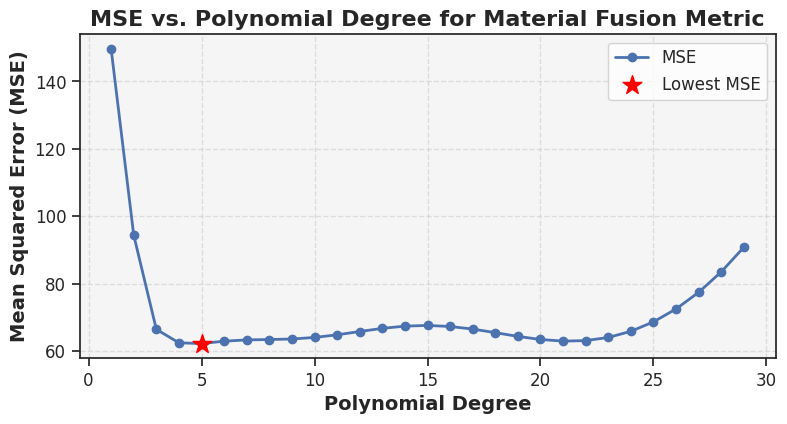

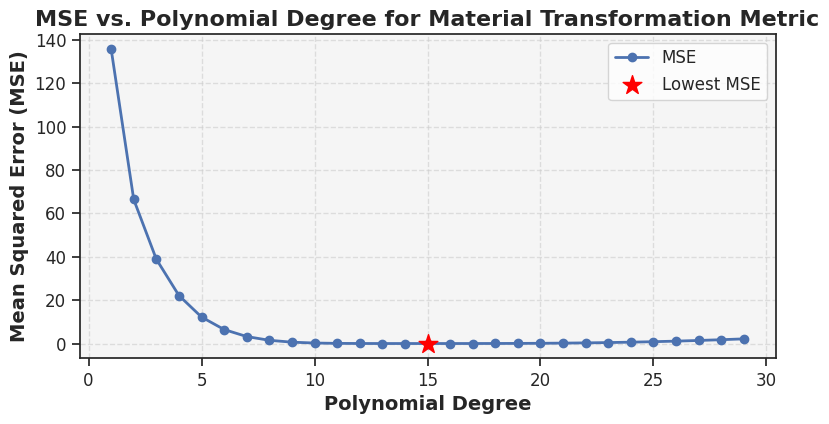

In [8]:
for column in X.columns:
    degrees = list(range(1, 30)) 
    mse_list = mse_values[column]
    
    plt.figure(figsize=(8, 4))
    
    # Plot the MSE values for different polynomial degrees
    plt.plot(degrees, mse_list, marker='o', linestyle='-', color='b', label='MSE', linewidth=2)
    
    # Find the index of the lowest MSE
    lowest_mse_index = np.argmin(mse_list)
    lowest_mse_degree = degrees[lowest_mse_index]
    lowest_mse = mse_list[lowest_mse_index]
    
    # Highlight the lowest MSE point with a red star
    plt.scatter(lowest_mse_degree, lowest_mse, color='red', marker='*', s=200, label='Lowest MSE', zorder=3)
    
    plt.title(f'MSE vs. Polynomial Degree for {column}', fontsize=16, fontweight='bold')
    plt.xlabel('Polynomial Degree', fontsize=14, fontweight='bold')
    plt.ylabel('Mean Squared Error (MSE)', fontsize=14, fontweight='bold')
    
    plt.legend(fontsize=12)
    
    plt.grid(True, linestyle='--', alpha=0.6)
    
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    
    ax = plt.gca()
    ax.set_facecolor('#F5F5F5')
    plt.show()

<p style="font-size: 24px; font-weight: bold; color:rgb(255, 213, 0); margin-top: 10px;">Extracting and Reshaping Features</p>

## Data Preparation: Extracting and Reshaping Features

### Code Overview

In this code segment, we perform the following operations:

1. **Data Extraction**: Specific columns from the `df_train` DataFrame are selected for further processing. These columns are chosen based on their relevance to the machine learning task at hand.

2. **Reshaping into 2D NumPy Arrays**: The selected columns are reshaped into 2D NumPy arrays. This transformation is a fundamental step in data preparation for machine learning tasks. It ensures that the data is in the right format to be used as input for various machine learning algorithms.

This data preparation step is crucial for setting up the input features correctly and is a foundational step in any machine learning workflow. It allows us to efficiently utilize the selected data columns for model training and evaluation.
``

In [9]:
df_train = pd.concat([y_train, X_train], axis=1, sort=True)
Temperature_train = df_train["Temperature (°C)"].values.reshape(-1,1)
Pressure_train = df_train["Pressure (kPa)"].values.reshape(-1,1)
TempPress_train = df_train["Temperature x Pressure"].values.reshape(-1,1)
Fusion_train = df_train["Material Fusion Metric"].values.reshape(-1,1)
Transformation_train = df_train["Material Transformation Metric"].values.reshape(-1,1)


In this code segment, we perform the following operations:

1. **Data Extraction**: Specific columns from the `df_test` DataFrame are selected for further processing. These columns are chosen based on their relevance to the machine learning task at hand.

2. **Reshaping into 2D NumPy Arrays**: The selected columns are reshaped into 2D NumPy arrays. This transformation is a fundamental step in data preparation for machine learning tasks. It ensures that the data is in the right format to be used as input for various machine learning algorithms.

This data preparation step is crucial for setting up the input features correctly and is a foundational step in any machine learning workflow. It allows us to efficiently utilize the selected data columns for model training and evaluation.
``

In [10]:
df_test = pd.concat([y_test, X_test], axis=1, sort=True)
Temperature_test = df_test["Temperature (°C)"].values.reshape(-1, 1)
Pressure_test = df_test["Pressure (kPa)"].values.reshape(-1, 1)
TempPress_test = df_test["Temperature x Pressure"].values.reshape(-1, 1)
Fusion_test = df_test["Material Fusion Metric"].values.reshape(-1, 1)
Transformation_test = df_test["Material Transformation Metric"].values.reshape(-1, 1)

## Polynomial Feature Generation for Enhanced Data Complexity

### Code Overview

In this code snippet, we achieve the following objectives:

1. **Generating Polynomial Features**: The code is responsible for generating polynomial features for multiple datasets, each with varying degrees of complexity. This is accomplished using the `PolynomialFeatures` class, a crucial preprocessing step in machine learning.

2. **Transformation with Polynomial Combinations**: The core functionality involves transforming the original data by creating polynomial combinations of the input features. This transformation expands the feature space, potentially capturing more intricate relationships within the data.

3. **Degree Selection (not from "best_degrees" Dictionary)**: The degree of the polynomial features for each dataset is determined dynamically from a dictionary called "best_degrees." However, the smallest degree that has a similar MSE value to the min MSE value has chosen. This allows for adaptability and tailoring the model complexity to each specific dataset's needs.

4. **Complexity Enhancement for Machine Learning**: By introducing polynomial features, this code prepares the data for machine learning modeling. It helps in capturing complex relationships that may not be evident in the original feature set. This is essential for improving the model's ability to generalize and make accurate predictions on diverse datasets.

The incorporation of polynomial features is a powerful technique in machine learning that enhances the representation of data, making it more suitable for modeling complex patterns and relationships.


In [11]:
poly_features = PolynomialFeatures(degree =  13) #best_degrees["Temperature (°C)"])
Temperature_train = poly_features.fit_transform(Temperature_train)
Temperature_test  = poly_features.fit_transform(Temperature_test)

poly_features = PolynomialFeatures(degree =  best_degrees["Pressure (kPa)"])
Pressure_train = poly_features.fit_transform(Pressure_train)
Pressure_test  = poly_features.fit_transform(Pressure_test)

poly_features = PolynomialFeatures(degree = 5)#best_degrees['Temperature x Pressure'])
TempPress_train = poly_features.fit_transform(TempPress_train)
TempPress_test  = poly_features.fit_transform(TempPress_test)

poly_features = PolynomialFeatures(degree  = 5)# best_degrees[ 'Material Fusion Metric'])
Fusion_train= poly_features.fit_transform(Fusion_train)
Fusion_test  = poly_features.fit_transform(Fusion_test)

poly_features = PolynomialFeatures(degree  = 10)# best_degrees["Material Transformation Metric"])
Transformation_train = poly_features.fit_transform(Transformation_train)
Transformation_test  = poly_features.fit_transform(Transformation_test)

New train and test sets are created.

In [12]:
X_train1 = np.concatenate((Temperature_train,Pressure_train,TempPress_train,Fusion_train,Transformation_train),axis =1)
X_test1 = np.concatenate((Temperature_test, Pressure_test, TempPress_test, Fusion_test, Transformation_test), axis=1)

## Element-wise Multiplication and Cartesian Product Operations

### Code Overview

This code segment is responsible for two distinct operations:

1. **Element-wise Multiplication (mul function)**: The `mul` function is utilized for performing element-wise multiplication between two Pandas Series or DataFrames. In essence, it multiplies each element in one Series or DataFrame with the corresponding element in another Series or DataFrame. The result is a new Series or DataFrame with the same shape.

2. **Cartesian Product Operations**: In this specific context, the code creates several new columns (int1 to int14) in a DataFrame (named `X_train` and `X_test`). These new columns are generated by performing Cartesian product operations between pairs of existing columns. The Cartesian product involves multiplying each element in one column by each element in another column, resulting in a new column that contains the combined values.

#### Detailed Breakdown

Here's a breakdown of the Cartesian product operations being performed:

- `int1`: The product of 'Pressure (kPa)' and 'Temperature (°C)' is calculated and stored in the 'int1' column.

- Additional Cartesian product pairs are calculated and stored in columns 'int2' through 'int14', following the same principle.

This approach helps introduce additional features or dimensions to the dataset, potentially capturing interactions or dependencies between the original columns. It can be beneficial for enhancing the dataset's representational power, particularly in machine learning tasks where complex relationships need to be modeled.

The combination of element-wise multiplication and Cartesian product operations contributes to feature engineering, ultimately aiding in building more informative and robust machine learning models.


In [13]:
# Assuming you have a DataFrame X_train

# Cartesian product between 'Pressure (kPa)' and 'Temperature (°C)'
X_train["int1"] = X_train["Pressure (kPa)"].mul(X_train["Temperature (°C)"])

# Cartesian product between 'Temperature x Pressure' and 'Temperature (°C)'
X_train["int2"] = X_train["Temperature x Pressure"].mul(X_train["Temperature (°C)"])

# Cartesian product between 'Material Fusion Metric' and 'Temperature (°C)'
X_train["int3"] = X_train["Material Fusion Metric"].mul(X_train["Temperature (°C)"])

# Cartesian product between 'Material Transformation Metric' and 'Pressure (kPa)'
X_train["int4"] = X_train["Material Transformation Metric"].mul(X_train["Pressure (kPa)"])

# Cartesian product between 'Temperature x Pressure' and 'Pressure (kPa)'
X_train["int5"] = X_train["Temperature x Pressure"].mul(X_train["Pressure (kPa)"])

# Cartesian product between 'Material Fusion Metric' and 'Pressure (kPa)'
X_train["int6"] = X_train["Material Fusion Metric"].mul(X_train["Pressure (kPa)"])

# Cartesian product between 'Material Transformation Metric' and 'Temperature x Pressure'
X_train["int7"] = X_train["Material Transformation Metric"].mul(X_train["Temperature x Pressure"])

# Cartesian product between 'Material Fusion Metric' and 'Material Transformation Metric'
X_train["int8"] = X_train["Material Fusion Metric"].mul(X_train["Material Transformation Metric"])

# Additional Cartesian product pairs
X_train["int9"] = X_train["Pressure (kPa)"].mul(X_train["Material Fusion Metric"])
X_train["int10"] = X_train["Pressure (kPa)"].mul(X_train["Material Transformation Metric"])
X_train["int11"] = X_train["Temperature x Pressure"].mul(X_train["Material Fusion Metric"])
X_train["int12"] = X_train["Temperature x Pressure"].mul(X_train["Material Transformation Metric"])
X_train["int13"] = X_train["Material Fusion Metric"].mul(X_train["Material Fusion Metric"])
X_train["int14"] = X_train["Material Transformation Metric"].mul(X_train["Material Transformation Metric"])

In [14]:
# Cartesian product between 'Pressure (kPa)' and 'Temperature (°C)'
X_test["int1"] = X_test["Pressure (kPa)"].mul(X_test["Temperature (°C)"])

# Cartesian product between 'Temperature x Pressure' and 'Temperature (°C)'
X_test["int2"] = X_test["Temperature x Pressure"].mul(X_test["Temperature (°C)"])

# Cartesian product between 'Material Fusion Metric' and 'Temperature (°C)'
X_test["int3"] = X_test["Material Fusion Metric"].mul(X_test["Temperature (°C)"])

# Cartesian product between 'Material Transformation Metric' and 'Pressure (kPa)'
X_test["int4"] = X_test["Material Transformation Metric"].mul(X_test["Pressure (kPa)"])

# Cartesian product between 'Temperature x Pressure' and 'Pressure (kPa)'
X_test["int5"] = X_test["Temperature x Pressure"].mul(X_test["Pressure (kPa)"])

# Cartesian product between 'Material Fusion Metric' and 'Pressure (kPa)'
X_test["int6"] = X_test["Material Fusion Metric"].mul(X_test["Pressure (kPa)"])

# Cartesian product between 'Material Transformation Metric' and 'Temperature x Pressure'
X_test["int7"] = X_test["Material Transformation Metric"].mul(X_test["Temperature x Pressure"])

# Cartesian product between 'Material Fusion Metric' and 'Material Transformation Metric'
X_test["int8"] = X_test["Material Fusion Metric"].mul(X_test["Material Transformation Metric"])

# Additional Cartesian product pairs
X_test["int9"] = X_test["Pressure (kPa)"].mul(X_test["Material Fusion Metric"])
X_test["int10"] = X_test["Pressure (kPa)"].mul(X_test["Material Transformation Metric"])
X_test["int11"] = X_test["Temperature x Pressure"].mul(X_test["Material Fusion Metric"])
X_test["int12"] = X_test["Temperature x Pressure"].mul(X_test["Material Transformation Metric"])
X_test["int13"] = X_test["Material Fusion Metric"].mul(X_test["Material Fusion Metric"])
X_test["int14"] = X_test["Material Transformation Metric"].mul(X_test["Material Transformation Metric"])

## Selection and Conversion of Specific Columns into NumPy Arrays

### Code Overview

In this code segment, we focus on the following tasks:

1. **Column Selection**: The code is responsible for selecting specific columns from the `X_train` and `X_test` DataFrames. These chosen columns are labeled 'int1' through 'int14'.

2. **Conversion into NumPy Arrays**: Once the desired columns are selected, they are converted into NumPy arrays. The resulting arrays are named `X_train2` and `X_test2`.

#### Detailed Explanation

- **Column Selection**: The code chooses columns 'int1' through 'int14' from the `X_train` and `X_test` DataFrames. These columns are likely identified as relevant for the specific analysis or modeling being conducted.

- **Conversion into NumPy Arrays**: After the selection process, the selected columns are transformed into NumPy arrays, which are widely used in numerical computing and machine learning. The resulting arrays, `X_train2` and `X_test2`, are now ready for further processing and analysis.

This code segment is crucial for data preparation and feature selection. It helps in isolating specific features or dimensions that are considered essential for the modeling or analysis task at hand, ensuring that the data is in the right format for downstream processes, such as machine learning algorithms.

The `X_train2` and `X_test2` arrays can subsequently be utilized as input features for various machine learning models, enhancing the overall workflow's efficiency and effectiveness.


In [15]:
X_train2 = np.array(X_train[['int1','int2','int3','int4','int5','int6','int7','int8','int9','int10','int11','int12','int13','int14']])
X_test2 = np.array(X_test[['int1','int2','int3','int4','int5','int6','int7','int8','int9','int10','int11','int12','int13','int14']])

In [16]:
X_train1 = np.concatenate ((X_train1, X_train2), axis = 1)
X_test1 = np.concatenate ((X_test1, X_test2), axis = 1)

<p style="font-size: 24px; font-weight: bold; color: #ff69b4; margin-top: 10px;">CREATE A POLYNOMIAL REGRESSION MODEL</p>

In [17]:
poly_reg = LinearRegression()
poly_reg.fit(X_train1, y_train)

LinearRegression()

<p style="font-size: 24px; font-weight: bold; color:rgb(255, 204, 0); margin-top: 10px;">WHAT ABOUT ITS PERFORMANCE?</p>

*The test R-squared score of approximately -0.0016 suggests that the polynomial regression model doesn't perform well on the test data. It's essentially not explaining the variance in the test data, and the model's predictions are not significantly better than random guessing. This could indicate overfitting or that the model is not capturing the underlying patterns in the data.*

In [18]:
score = poly_reg.score(X_test1, y_test)
print("R-squared score of the test:", score)

R-squared score of the test: -0.0016491787398942304


In [19]:
score = poly_reg.score(X_train1, y_train)
print("R-squared score of the train:", score)

R-squared score of the train: 0.0007980926119611764


In [20]:
y_pred_train = poly_reg.predict(X_train1)

for i, (real_value, prediction) in enumerate(zip(y_train.iloc[:10], y_pred_train[:10])):
    print(f"Sample {i + 1} - Real Value: {real_value}, Predicted Value: {prediction}")

Sample 1 - Real Value: 99.9998950832658, Predicted Value: 96.17520448350191
Sample 2 - Real Value: 99.99999996545394, Predicted Value: 96.2188159875466
Sample 3 - Real Value: 99.99999999972384, Predicted Value: 96.17819223267455
Sample 4 - Real Value: 100.0, Predicted Value: 96.17509728326546
Sample 5 - Real Value: 100.0, Predicted Value: 96.1740794147056
Sample 6 - Real Value: 46.3670249698838, Predicted Value: 96.18483234680298
Sample 7 - Real Value: 99.9981213046946, Predicted Value: 96.96066189652873
Sample 8 - Real Value: 99.9994029171498, Predicted Value: 96.17404922591896
Sample 9 - Real Value: 100.0, Predicted Value: 96.35577430613155
Sample 10 - Real Value: 99.99999997078464, Predicted Value: 96.1747518135869


In [21]:
y_pred_test = poly_reg.predict(X_test1)

for i, (real_value, prediction) in enumerate(zip(y_test.iloc[:10], y_pred_test[:10])):
    print(f"Sample {i + 1} - Real Value: {real_value}, Predicted Value: {prediction}")

Sample 1 - Real Value: 4.052686484307197, Predicted Value: 96.17410035877887
Sample 2 - Real Value: 98.8730359715154, Predicted Value: 97.41499550559855
Sample 3 - Real Value: 96.91493256400273, Predicted Value: 96.17588976563071
Sample 4 - Real Value: 99.9515431703238, Predicted Value: 96.17403554651067
Sample 5 - Real Value: 99.99999939463342, Predicted Value: 96.52605182347811
Sample 6 - Real Value: 99.99999801897562, Predicted Value: 96.17403554940546
Sample 7 - Real Value: 99.9999414424484, Predicted Value: 96.17406953082164
Sample 8 - Real Value: 99.99962261607838, Predicted Value: 96.17403584712304
Sample 9 - Real Value: 100.0, Predicted Value: 96.17414352997385
Sample 10 - Real Value: 59.01936688952299, Predicted Value: 96.17590772031271


<p style="font-size: 28px; font-weight: bold; color:rgb(255, 213, 0); margin: 20px auto; text-transform: uppercase; border: 2px solidrgb(255, 213, 0); padding: 10px; text-align: center;">Reviving Polynomial Regression</p>
<p style="font-size: 24px; font-weight: bold; color:rgb(255, 213, 0); margin: 12px auto; text-align: ;">NOW, POLYNOMIAL REGRESSION WILL BE GIVEN A SECOND CHANCE, BUT THIS TIME, NO SPECIFIC DEGREE WILL BE ASSIGNED TO EACH COLUMN.</p>


## Polynomial Regression for Best-Fitting Model

### Code Summary

This code snippet conducts polynomial regression with varying degrees to determine the best-fitting model. It computes the Root Mean Squared Error (RMSE) for each degree and identifies the degree that yields the minimum RMSE. This process aids in selecting the most appropriate polynomial degree for the regression model.


In [22]:
rmse= []
degrees = np.arange(1,5)
min_rmse , min_value = 1e10, 0

for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree)
    X_poly_train = poly_features.fit_transform(X_train)
    
    # Create and train a linear regression model
    model = LinearRegression()
    model.fit(X_poly_train, y_train)
    
    X_poly_test = poly_features.fit_transform(X_test)

    # Make predictions
    y_pred = model.predict(X_poly_test)
    
    # Calculate RMSE
    mse = mean_squared_error(y_test, y_pred)
    current_rmse = np.sqrt(mse)
    
    # Store RMSE values
    rmse.append(current_rmse)
    
    # Check if this is the model with the lowest RMSE
    if current_rmse < min_rmse:
        min_rmse = current_rmse
        min_degree = degree

print("RMSE values for polynomial degrees 2 to 5:", rmse)
print("Minimum RMSE:", min_rmse)
print("Degree with minimum RMSE:", min_degree)

RMSE values for polynomial degrees 2 to 5: [5.30348516823116, 1.2997157324637336, 0.5716031061284235, 0.13638521334079295]
Minimum RMSE: 0.13638521334079295
Degree with minimum RMSE: 4


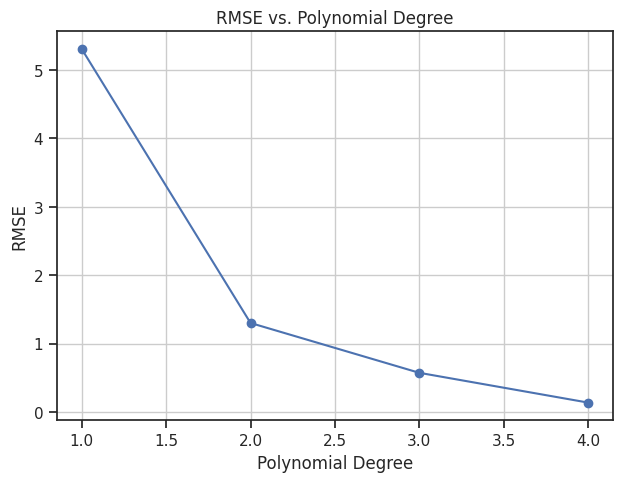

In [23]:
plt.plot(degrees, rmse, marker='o')
plt.title('RMSE vs. Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('RMSE')
plt.grid(True)
plt.show()

In [24]:
poly_degree = PolynomialFeatures(degree = 2)
X_train_pol = poly_degree.fit_transform(X_train)
X_test_pol = poly_degree.transform(X_test)

In [25]:
PR = LinearRegression()
PR.fit(X_train_pol, y_train)
y_pred_PR = PR.predict(X_test_pol)
mse_PR = mean_squared_error(y_test, y_pred_PR)# Calculate the Mean Squared Error (MSE)
# Print the scores for Polynomial Regression
print(f"Polynomial Regression MSE: {mse_PR}")
print(f"Polynomial Regression Score on test: {PR.score(X_test_pol, y_test)}")
print(f"Polynomial Regression Score on train: {PR.score(X_train_pol, y_train)}")
print("\n")
LR = LinearRegression()
LR.fit(X_train, y_train)
y_pred_LR = LR.predict(X_test)
mse_LR = mean_squared_error(y_test, y_pred_LR)# Calculate the Mean Squared Error (MSE)
# Print the scores for Linear Regression
print(f"Linear Regression MSE: {mse_LR}")
print(f"Linear Regression Score on test:{ LR.score(X_test, y_test)}")
print(f"Linear Regression Score on train:{ LR.score(X_train, y_train)}")

Polynomial Regression MSE: 1.6892609852137395
Polynomial Regression Score on test: 0.991725417775708
Polynomial Regression Score on train: 0.9908949665411101


Linear Regression MSE: 27.882923390742647
Linear Regression Score on test:0.8634198360881802
Linear Regression Score on train:0.8607186051220496


<p style="font-size: 24px; font-weight: bold; colorrgb(255, 213, 0); margin-top: 10px;">GRAPHS</p>

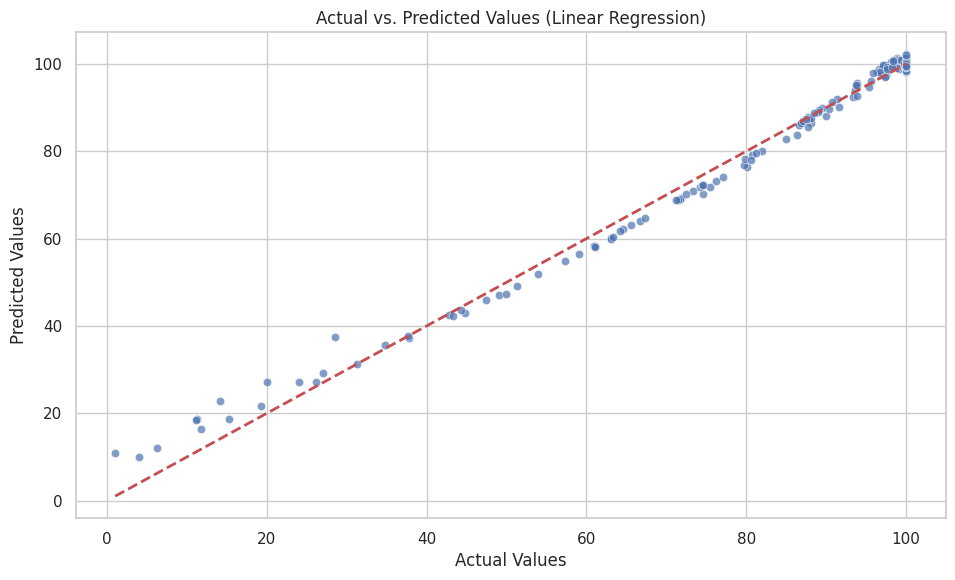

In [26]:
# Create a scatterplot of actual vs. predicted values
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.scatterplot(x=y_test, y=y_pred_PR, color='b', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='r', linewidth=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (Linear Regression)")
plt.show()

**Explanation:** This scatterplot compares the actual target values (y_test) with the predicted values (y_pred_PR) by the linear regression model. The red dashed line represents a perfect 1:1 relationship between actual and predicted values. Points close to this line indicate accurate predictions.

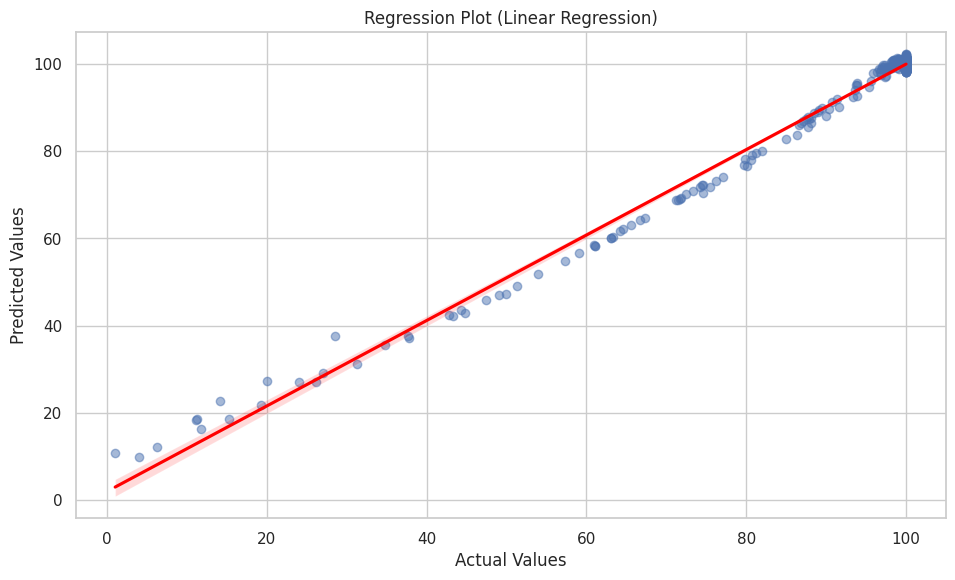

In [27]:
# Create a regression plot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.regplot(x=y_test, y=y_pred_PR, scatter_kws={"alpha":0.5}, line_kws={"color":"red"})
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Regression Plot (Linear Regression)")
plt.show()

**Explanation:** The regression plot provides a more detailed view of the relationship between actual and predicted values. The red line is the regression line fitted to the data points. It shows the overall trend in the predictions. The scatter points represent individual data points, and their distribution around the regression line indicates how well the model fits the data.

Text(0.5, 1.0, 'Residuals vs. Fitted Values')

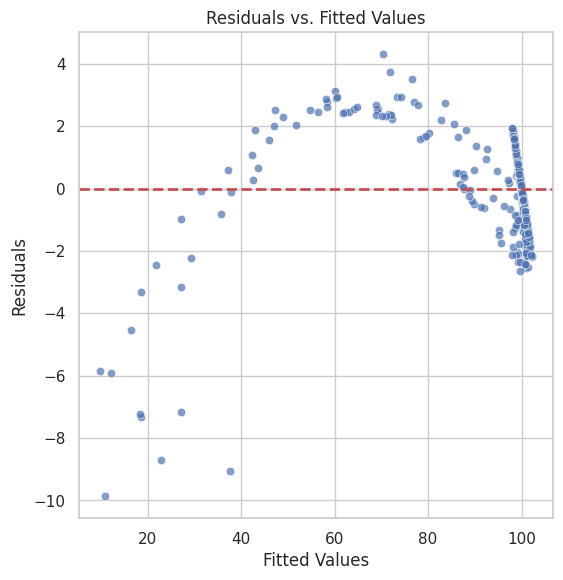

In [28]:
# Create residual plots
plt.figure(figsize=(12, 6))
# Residuals vs. Fitted Values
plt.subplot(1, 2, 1)
sns.set(style="whitegrid")
sns.scatterplot(x=y_pred_PR, y=y_test-y_pred_PR, color='b', alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values")

**Explanation:** This plot displays the residuals (the differences between actual and predicted values) against the fitted values (predicted values). The red dashed line at y=0 represents zero residual error. Points scattered randomly around this line suggest that the model's predictions are unbiased.

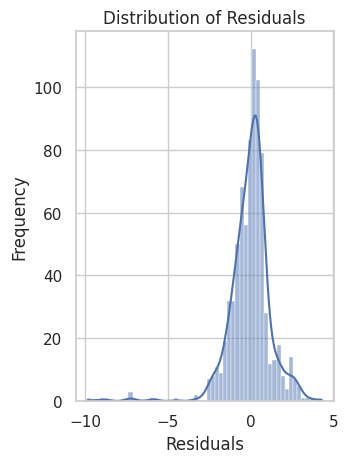

In [29]:
# Distribution of Residuals
plt.subplot(1, 2, 2)
sns.set(style="whitegrid")
sns.histplot(y_test - y_pred_PR, kde=True, color='b')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.tight_layout()
plt.show()

**Explanation:** This histogram with a kernel density estimate shows the distribution of the residuals. A normally distributed histogram suggests that the residuals are approximately normally distributed, which is a common assumption in linear regression. Outliers or skewness in the distribution may indicate issues with model assumptions.


In [30]:
# Display the Mean Squared Error
print(f"Mean Squared Error (MSE): {mse_PR:.2f}")

Mean Squared Error (MSE): 1.69


**Explanation:** Finally, the Mean Squared Error (MSE) quantifies the overall performance of the linear regression model. It measures the average squared difference between the actual and predicted values. A lower MSE indicates better model performance.

 <div style="border:#283618 2px solid ; background-color: #FEFAE0; padding: 20px;">
<font face="Pacifico" color="#606C38" size="5"><b>If you find value in this notebook, I would greatly appreciate it if you could consider giving it a like, following me for more updates, and sharing it with others who might also benefit from it.</b></font>

<font face="Pacifico" color="#DDA15E" size="4"><i>Your support means a lot to me and helps me continue sharing insights and knowledge within the Kaggle community.</i></font>

<font face="Pacifico" color="#BC6C25" size="4"><b>Thank you!</b></font>
</div>